<a href="https://colab.research.google.com/github/CoolHero83/Prediccion-Transacciones-Fraudulentas/blob/main/RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# prompt: leer el archi csv


import pandas as pd
import pathlib

RUTA = pathlib.Path(__vsc_ipynb_file__).parent.parent # type: ignore

df = pd.read_csv(f"{RUTA}/Data/Data2.csv", encoding='latin1', sep=',', on_bad_lines='skip')
df.shape

(1999889, 26)

In [2]:
df.head(5)

,Amount,Is_Fraud,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Time,LimiteCredito,Errors_Insufficient Balance,...,Dia_Semana_MiÃ©rcoles,Dia_Semana_SÃ¡bado,Dia_Semana_Viernes,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid)
0,0.870166,0,1.058518,-0.269604,0.217595,-4.105101,-1.592169,0.905811,1.531309,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.744696,0,1.058518,-0.269604,0.217595,-4.105101,-1.592169,-1.230862,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.060533,0,1.058518,-0.269604,0.217595,-4.105101,-1.592169,-0.445224,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.139404,0,1.058518,-0.269604,0.217595,-4.105101,-1.304044,-1.142108,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.390713,0,1.058518,-0.269604,0.217595,-4.105101,-1.304044,-0.326885,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [4]:
# Cargar datos
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']


In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
# Aplicar SMOTE para sobremuestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_sm, y_train_sm)
y_pred = logreg.predict(X_test)


In [8]:
# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test)

In [9]:
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[403134 196083]
 [   316    434]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80    599217
           1       0.00      0.58      0.00       750

    accuracy                           0.67    599967
   macro avg       0.50      0.63      0.40    599967
weighted avg       1.00      0.67      0.80    599967



In [10]:
# Identificando el procentual de error

from sklearn.metrics import mean_squared_error
from sklearn import metrics

error = mean_squared_error(y_test, y_pred)
print("Error porcentual : %f" % (error*100))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

Error porcentual : 32.734967
Exactitud: 0.672650329101434


In [12]:
#poner a prueba el modelo clf

RUTA = pathlib.Path(__vsc_ipynb_file__).parent.parent # type: ignore
DatosPrueba = pd.read_csv(f"{RUTA}/Data/DatosVerificacion.csv", encoding='latin1', sep=',', on_bad_lines='skip')
DatosPrueba.shape

(10, 26)

In [13]:
XPrueba = DatosPrueba.drop('Is_Fraud', axis=1)
yPrueba = DatosPrueba['Is_Fraud']


In [14]:
Prediccion = logreg.predict(XPrueba)

In [15]:
#El conjunto de datos para prueba tiene 10 transacciones, 5 fraudulentas y 5 que no lo son, DatosPrueba =[1,1,1,1,1,0,0,0,0,,0]
Prediccion

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

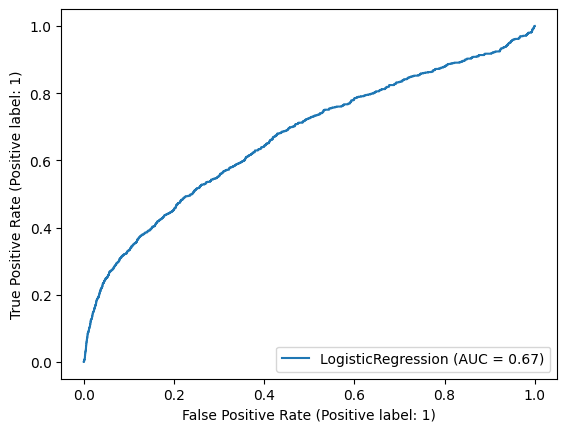

In [16]:
# graficamente como clasisfica el modelo

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.show()
